In [7]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)


2.3.1
2.4.0


In [8]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [10]:
# X_train

# Keras

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [12]:
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history])

Epoch 1/100
943/943 [==============================] - 1s 2ms/step - loss: 0.4515 - accuracy: 0.7847 - val_loss: 0.4004 - val_accuracy: 0.7925
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3797 - accuracy: 0.8139 - val_loss: 0.3788 - val_accuracy: 0.8163
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3747 - accuracy: 0.8136 - val_loss: 0.3691 - val_accuracy: 0.8129
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3747 - accuracy: 0.8106 - val_loss: 0.3833 - val_accuracy: 0.7996
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3733 - accuracy: 0.8125 - val_loss: 0.3683 - val_accuracy: 0.8152
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3704 - accuracy: 0.8151 - val_loss: 0.3792 - val_accuracy: 0.7993
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3701 - accuracy: 0.8145 - val_loss: 0.3655 - val_accuracy: 0.8136

Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3629 - accuracy: 0.8168 - val_loss: 0.3663 - val_accuracy: 0.8195
Epoch 59/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3601 - accuracy: 0.8184 - val_loss: 0.3632 - val_accuracy: 0.8176
Epoch 60/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3602 - accuracy: 0.8173 - val_loss: 0.3715 - val_accuracy: 0.8150
Epoch 61/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3606 - accuracy: 0.8189 - val_loss: 0.3772 - val_accuracy: 0.8134
Epoch 62/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3596 - accuracy: 0.8188 - val_loss: 0.3734 - val_accuracy: 0.8078
Epoch 63/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8189 - val_loss: 0.3685 - val_accuracy: 0.8207
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3593 - accuracy: 0.8196 - val_loss: 0.3711 - val_accuracy:

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

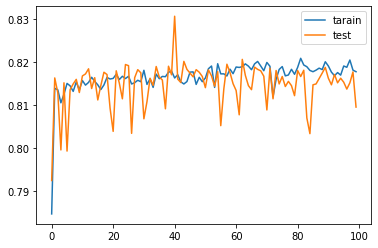

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = "tarain")
plt.plot(history.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

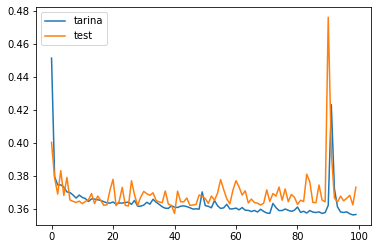

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = "tarina")
plt.plot(history.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [19]:
model.predict(X_test)

array([[0.00222158],
       [0.26491243],
       [0.5134514 ],
       ...,
       [0.72171247],
       [0.65217686],
       [0.7741071 ]], dtype=float32)

In [20]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 684us/step - loss: 0.3733 - accuracy: 0.8096


[0.3733174800872803, 0.8095617294311523]

In [21]:
print(model.predict(X_test).shape)
print(y_test.shape)

(15060, 1)
(15060,)


In [22]:
p = model.predict(X_test)
p[p<0.5]=0
p[p>0.5]=1
p

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [23]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= p )

0.8095617529880478

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

# Zad

Porównaj fukcje aktywacji
* sigmoid
* tanh
* relu

# tanh

# relu